# Breast Cancer Detection
Using deep learning techniques

## Load and prepare Data

At first we are downloading the Mammograms Dataset, containing about 11k images divided into three categories (Normal, benign, malignant).
the Mammograms Datasets: https://drive.google.com/drive/folders/1XvKmNlAtoOXaUT1SWavC5RTjA-8Hi5M-?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PS: We moved each Mammograms to it's folder class.
The images 884, 3246, 6689 and 10067 are corrupted, so we deleted them.

In [3]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data_dir = '/content/drive/MyDrive/Mini Projet IA/ddsmROI/'
os.listdir(data_dir)
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()

Found 11214 files belonging to 3 classes.


Batch contains a sample of 32 random images from our Dataset

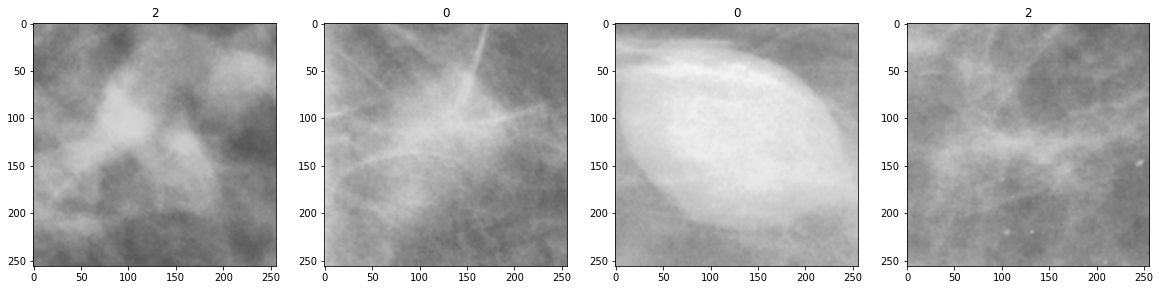

In [5]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0 ==> "Benign"

1 ==> "Malignant"

2 ==> "Normal"

**Scale Date**

In [6]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.80784315, 0.80784315, 0.80784315],
          [0.8029412 , 0.8029412 , 0.8029412 ],
          [0.79313725, 0.79313725, 0.79313725],
          ...,
          [0.7872549 , 0.7872549 , 0.7872549 ],
          [0.8009804 , 0.8009804 , 0.8009804 ],
          [0.80784315, 0.80784315, 0.80784315]],
 
         [[0.80196077, 0.80196077, 0.80196077],
          [0.7973039 , 0.7973039 , 0.7973039 ],
          [0.7879902 , 0.7879902 , 0.7879902 ],
          ...,
          [0.7862745 , 0.7862745 , 0.7862745 ],
          [0.7980392 , 0.7980392 , 0.7980392 ],
          [0.8039216 , 0.8039216 , 0.8039216 ]],
 
         [[0.79019606, 0.79019606, 0.79019606],
          [0.7860294 , 0.7860294 , 0.7860294 ],
          [0.7776961 , 0.7776961 , 0.7776961 ],
          ...,
          [0.78431374, 0.78431374, 0.78431374],
          [0.7921569 , 0.7921569 , 0.7921569 ],
          [0.79607844, 0.79607844, 0.79607844]],
 
         ...,
 
         [[0.46470588, 0.46470588, 0.46470588],
          [0.46397

**Split Data**

In [7]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [8]:
len(data)

351

In [9]:
train_size+val_size+test_size

351

len(data) is equal to train_size + val_size + test_size


So we're good to go

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [30]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## Train Model

In [32]:
logdir='/content/drive/MyDrive/Mini Projet IA/logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
246/246 [==============================] - 517s 2s/step - loss: 0.6052 - accuracy: 0.8227 - val_loss: 0.5508 - val_accuracy: 0.8121
Epoch 2/10
246/246 [==============================] - 507s 2s/step - loss: 0.5219 - accuracy: 0.8298 - val_loss: 0.5163 - val_accuracy: 0.8290
Epoch 3/10
246/246 [==============================] - 504s 2s/step - loss: 0.4992 - accuracy: 0.8374 - val_loss: 0.5099 - val_accuracy: 0.8232
Epoch 4/10
246/246 [==============================] - 481s 2s/step - loss: 0.4735 - accuracy: 0.8418 - val_loss: 0.4773 - val_accuracy: 0.8366
Epoch 5/10
246/246 [==============================] - 480s 2s/step - loss: 0.4555 - accuracy: 0.8479 - val_loss: 0.4749 - val_accuracy: 0.8424
Epoch 6/10
246/246 [==============================] - 501s 2s/step - loss: 0.4448 - accuracy: 0.8493 - val_loss: 0.4699 - val_accuracy: 0.8433
Epoch 7/10
246/246 [==============================] - 477s 2s/step - loss: 0.4380 - accuracy: 0.8518 - val_loss: 0.4706 - val_accuracy: 0.8411

## Verify Model

### Plot Performance

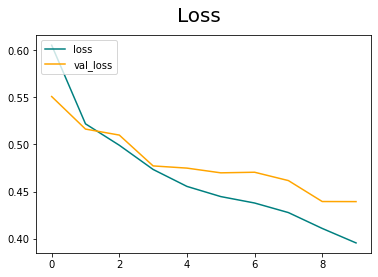

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

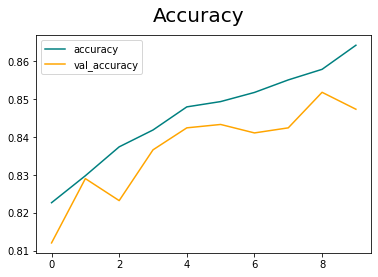

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate

In [38]:
model.evaluate(test)

35/35 [==============================] - 44s 540ms/step - loss: 0.4592 - accuracy: 0.8494


[0.4591776430606842, 0.8493648171424866]

## Save Model

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save('/content/drive/MyDrive/Mini Projet IA/models/mammogramsclassifier.h5')